In [1]:
import pandas as pd

# If your file is tab-separated
df = pd.read_csv("marketing_campaign.csv", sep='\t')


FileNotFoundError: [Errno 2] No such file or directory: 'marketing_campaign.csv'

In [ ]:
print(df.columns.tolist())


['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [ ]:
df.columns = df.columns.str.lower().str.strip()  # lowercase and remove spaces
df['dt_customer'] = pd.to_datetime(df['dt_customer'], errors='coerce')
df = df.sort_values('dt_customer').drop_duplicates(subset=['id'], keep='last')


In [ ]:
before = len(df)
dups = df.duplicated()
df = df.drop_duplicates()
after = len(df)
removed_dups = before - after
print(f"Removed {removed_dups} duplicate rows.")


Removed 0 duplicate rows.


In [ ]:
print(df.isna().sum())


id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer            1324
recency                   0
mntwines                  0
mntfruits                 0
mntmeatproducts           0
mntfishproducts           0
mntsweetproducts          0
mntgoldprods              0
numdealspurchases         0
numwebpurchases           0
numcatalogpurchases       0
numstorepurchases         0
numwebvisitsmonth         0
acceptedcmp3              0
acceptedcmp4              0
acceptedcmp5              0
acceptedcmp1              0
acceptedcmp2              0
complain                  0
z_costcontact             0
z_revenue                 0
response                  0
dtype: int64


In [ ]:
# Example: fill missing income with median
df['income'] = df['income'].fillna(df['income'].median())


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
# Basic info
print(df.info())

# Summary statistics
print(df.describe())

# First few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2240 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          916 non-null    datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

In [ ]:
# Example 1: Customer age
df['age'] = 2025 - df['year_birth']  # or use current year dynamically

# Example 2: Total purchases
df['total_purchases'] = (
    df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] +
    df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']
)

# Example 3: Number of accepted campaigns
df['num_accepted_campaigns'] = (
    df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] +
    df['acceptedcmp4'] + df['acceptedcmp5']
)


In [ ]:
print(df.isna().sum())


id                           0
year_birth                   0
education                    0
marital_status               0
income                       0
kidhome                      0
teenhome                     0
dt_customer               1324
recency                      0
mntwines                     0
mntfruits                    0
mntmeatproducts              0
mntfishproducts              0
mntsweetproducts             0
mntgoldprods                 0
numdealspurchases            0
numwebpurchases              0
numcatalogpurchases          0
numstorepurchases            0
numwebvisitsmonth            0
acceptedcmp3                 0
acceptedcmp4                 0
acceptedcmp5                 0
acceptedcmp1                 0
acceptedcmp2                 0
complain                     0
z_costcontact                0
z_revenue                    0
response                     0
age                          0
total_purchases              0
num_accepted_campaigns       0
dtype: i

In [ ]:
df['income'] = df['income'].fillna(df['income'].median())


In [ ]:
df['education'] = df['education'].fillna('Unknown')


In [ ]:
df = pd.get_dummies(df, columns=['education', 'marital_status'], drop_first=True)


In [ ]:
df.to_csv("cleaned_data.csv", index=False)


print("Cleaned data saved as 'cleaned_data.csv'")


Cleaned data saved as 'cleaned_data.csv'


In [ ]:
import os
print(os.listdir())  # Lists all files in your current working directory


['.ipynb_checkpoints', 'cleaned_data.csv', 'main.py', 'marketing_campaign.csv', 'Untitled.ipynb']


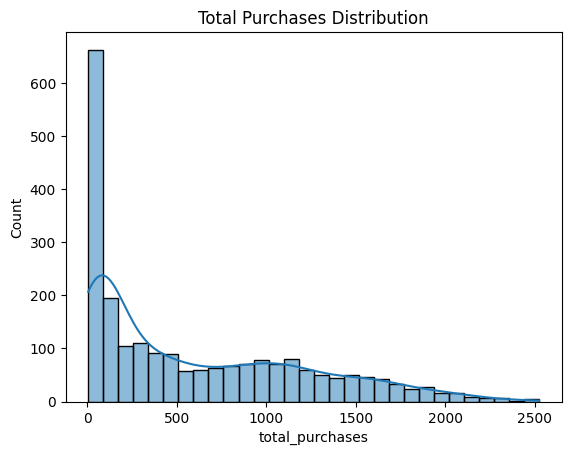

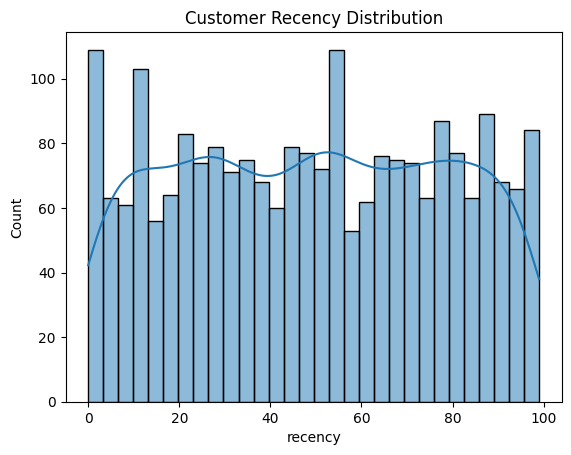

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of total purchases
sns.histplot(df['total_purchases'], bins=30, kde=True)
plt.title("Total Purchases Distribution")
plt.show()

# Recency distribution
sns.histplot(df['recency'], bins=30, kde=True)
plt.title("Customer Recency Distribution")
plt.show()


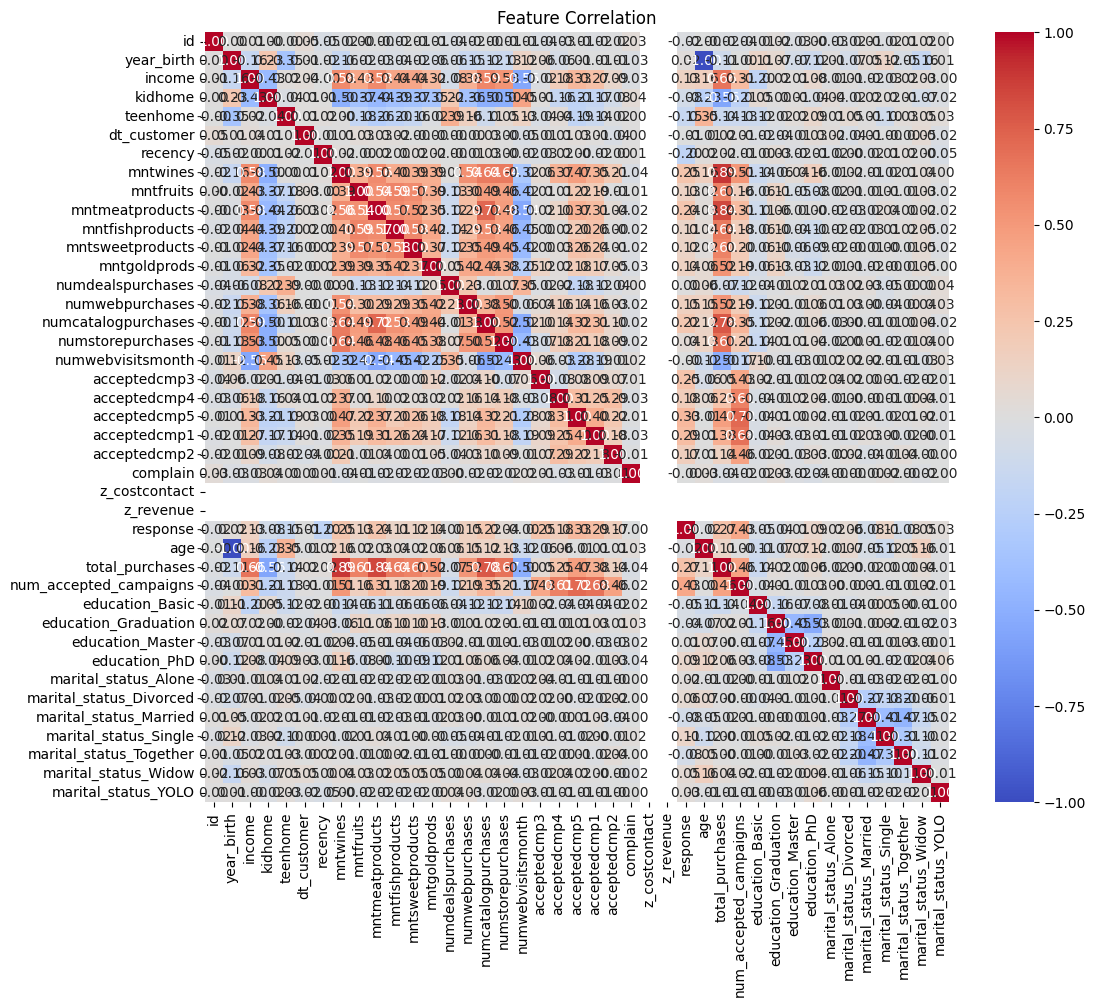

In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [ ]:
print(df.columns.tolist())


['id', 'year_birth', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response', 'age', 'total_purchases', 'num_accepted_campaigns', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'marital_status_Alone', 'marital_status_Divorced', 'marital_status_Married', 'marital_status_Single', 'marital_status_Together', 'marital_status_Widow', 'marital_status_YOLO', 'recency_score']


In [ ]:
df['frequency'] = (
    df['numdealspurchases'] + 
    df['numwebpurchases'] + 
    df['numcatalogpurchases'] + 
    df['numstorepurchases']
)


In [ ]:
import pandas as pd

df['frequency_score'] = pd.qcut(df['frequency'], 4, labels=[1,2,3,4])
df['monetary_score'] = pd.qcut(df['total_purchases'], 4, labels=[1,2,3,4])

# Combine RFM score
df['rfm_score'] = (
    df['recency_score'].astype(str) +
    df['frequency_score'].astype(str) +
    df['monetary_score'].astype(str)
)

print(df[['recency_score','frequency_score','monetary_score','rfm_score']].head())


  recency_score frequency_score monetary_score rfm_score
0             2               4              4       244
1             4               2              2       422
2             1               2              2       122
3             2               3              4       234
4             1               3              4       134


In [ ]:
# Example: define high-value customers
df['customer_segment'] = 'Low'
df.loc[df['rfm_score'].isin(['444','443','434','344']), 'customer_segment'] = 'High'
df.loc[df['rfm_score'].isin(['233','232','223','224']), 'customer_segment'] = 'Medium'

print(df[['rfm_score','customer_segment']].head(10))


  rfm_score customer_segment
0       244              Low
1       422              Low
2       122              Low
3       234              Low
4       134              Low
5       444             High
6       444             High
7       333              Low
8       332              Low
9       234              Low


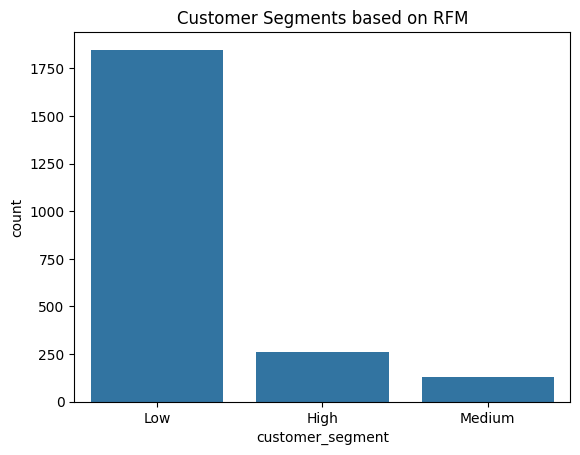

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='customer_segment', data=df)
plt.title("Customer Segments based on RFM")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['recency','frequency','total_purchases','num_accepted_campaigns','age']
X = df[features]
y = df['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8772321428571429
